# PyCaret 2 Clustering Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [ ]:
# check version
from pycaret.utils import version
version()

# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


# 2. Initialize Setup

In [3]:
from pycaret.clustering import *
clu1 = setup(data, ignore_features = ['Country Name'], session_id=123, log_experiment=True, log_plots = True, experiment_name='health1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(224, 21)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(224, 20)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


# 3. Create Model

In [4]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster.KMeans
ap,Affinity Propagation,sklearn.cluster.AffinityPropagation
meanshift,Mean shift Clustering,sklearn.cluster.MeanShift
sc,Spectral Clustering,sklearn.cluster.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster.DBSCAN
optics,OPTICS Clustering,sklearn.cluster.OPTICS
birch,Birch Clustering,sklearn.cluster.Birch
kmodes,K-Modes Clustering,git/nicodv/kmodes


In [6]:
kmeans = create_model('kmeans', num_clusters = 4)

,Metric
Silhouette,0.4335
Calinski-Harabasz,322.9575
Davies-Bouldin,0.7471


<Figure size 576x396 with 0 Axes>

In [7]:
kmodes = create_model('kmodes', num_clusters = 4)

,Metric
Silhouette,-0.3632
Calinski-Harabasz,1.2468
Davies-Bouldin,1.2297


<Figure size 576x396 with 0 Axes>

# 4. Assign Labels

In [8]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


# 5. Analyze Model

In [9]:
plot_model(kmeans)

In [14]:
plot_model(kmeans, feature = 'Country Name', label=True)

In [15]:
plot_model(kmeans, plot = 'tsne')

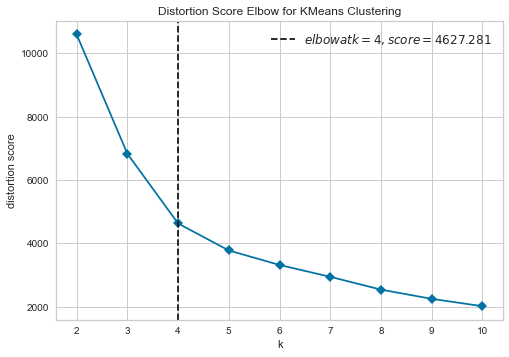

In [16]:
plot_model(kmeans, plot = 'elbow')

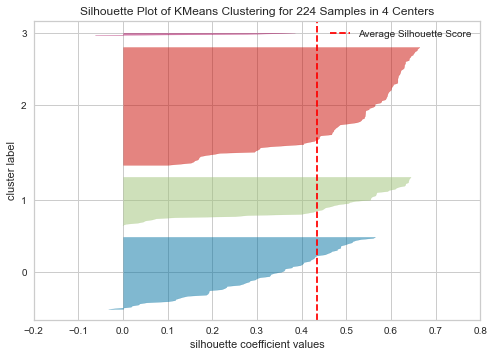

In [17]:
plot_model(kmeans, plot = 'silhouette')

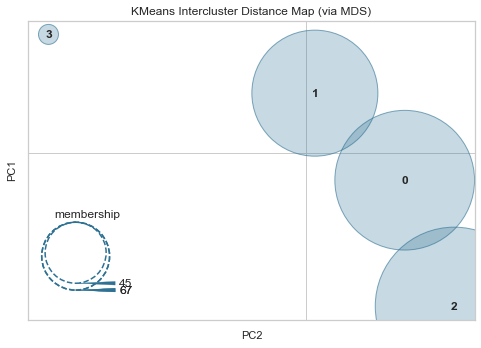

In [18]:
plot_model(kmeans, plot = 'distance')

In [19]:
plot_model(kmeans, plot = 'distribution')

# 6. Predict Model

In [20]:
pred_new = predict_model(kmeans, data=data)
pred_new.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


# 7. Save / Load Model

In [21]:
save_model(kmeans, model_name='kmeans')

Transformation Pipeline and Model Succesfully Saved


In [22]:
loaded_kmeans = load_model('kmeans')
print(loaded_kmeans)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
     

In [24]:
from sklearn import set_config
set_config(display='diagram')
loaded_kmeans[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('binn', Empty()),
                ('fix_perfect', Empty()), ('rem_outliers', Empty()),
                ('dummy', Dummify(target='dummy_target')),
                ('clean_names', Clean_Colum_Names()), ('fix_multi', Empty()),
                ('pca', Empty())],
         verbose=False)

In [25]:
from sklearn import set_config
set_config(display='text')

# 8. Deploy Model

In [27]:
deploy_model(kmeans, model_name = 'kmeans-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 9. Get Config / Set Config

In [29]:
X = get_config('X')
X.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [30]:
get_config('seed')

123

In [31]:
from pycaret.clustering import set_config
set_config('seed', 999)

In [32]:
get_config('seed')

999

# 10. Get System Logs

In [33]:
get_system_logs()

['2020-07-28 12', '03', '01,414', 'INFO', 'PyCaret Classification Module']
['2020-07-28 12', '03', '01,414', 'INFO', 'version pycaret-nightly-0.38']
['2020-07-28 12', '03', '01,414', 'INFO', 'Initializing setup()']
['2020-07-28 12', '03', '01,414', 'INFO', 'USI', 'e35e']
['2020-07-28 12', '03', '01,415', 'INFO', 'setup(data=(45211, 17), target=deposit, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove

["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='deposit')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
['verbose=False), Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['display_types=True, features_todrop=[],']
["ml_usecase='classification',"]
["numerical_features=[], target='deposit',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Le...

["criterion='gini',"]
['max_depth=None,']
['max_features=None,']
['max_leaf_nodes=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
['learning_rate=1.0, n_estimators=10, random_state=123)]']
['2020-07-28 12', '14', '53,815', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-28 12', '14', '53,815', 'INFO', 'SubProcess save_model() end ==================================']
['2020-07-28 12', '14', '53,961', 'INFO', 'create_model_container', '8']
['2020-07-28 12', '14', '53,961', 'INFO', 'master_model_container', '8']
['2020-07-28 12', '14', '53,961', 'INFO', 'display_container', '9']
['2020-07-28 12', '14', '53,962', 'INFO', "AdaBoostClassifier(algorithm='SAMME.R',"]
['base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,']
['class_weight=None,']
["criterion='gini',"]
['max_depth

['2020-07-28 12', '39', '41,758', 'INFO', 'Fitting Model']
['2020-07-28 12', '39', '42,026', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '39', '42,035', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '39', '42,040', 'INFO', 'Initializing Fold 6']
['2020-07-28 12', '39', '42,042', 'INFO', 'Fitting Model']
['2020-07-28 12', '39', '42,312', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '39', '42,321', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '39', '42,326', 'INFO', 'Initializing Fold 7']
['2020-07-28 12', '39', '42,327', 'INFO', 'Fitting Model']
['2020-07-28 12', '39', '42,596', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '39', '42,605', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '39', '42,610', 'INFO', 'Initializing Fold 8']
['2020-07-28 12', '39', '42,612', 'INFO', 'Fitting Model']
['2020-07-28 12', '39', '42,881', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '39', '42,890', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '39', '42,895', 'INFO', 'Initializing Fold 

['2020-07-28 12', '49', '30,576', 'INFO', 'Initializing Fold 3']
['2020-07-28 12', '49', '30,589', 'INFO', 'Fitting Model']
['2020-07-28 12', '49', '30,614', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '49', '30,630', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '49', '30,662', 'INFO', 'Initializing Fold 4']
['2020-07-28 12', '49', '30,677', 'INFO', 'Fitting Model']
['2020-07-28 12', '49', '30,699', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '49', '30,717', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '49', '30,751', 'INFO', 'Initializing Fold 5']
['2020-07-28 12', '49', '30,762', 'INFO', 'Fitting Model']
['2020-07-28 12', '49', '30,784', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '49', '30,803', 'INFO', 'Compiling Metrics']
['2020-07-28 12', '49', '30,838', 'INFO', 'Initializing Fold 6']
['2020-07-28 12', '49', '30,849', 'INFO', 'Fitting Model']
['2020-07-28 12', '49', '30,873', 'INFO', 'Evaluating Metrics']
['2020-07-28 12', '49', '30,892', 'INFO', 'Compiling Metric

['2020-07-28 13', '06', '21,742', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '21,752', 'INFO', 'Initializing Fold 4']
['2020-07-28 13', '06', '21,767', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '22,050', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '22,062', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '22,074', 'INFO', 'Initializing Fold 5']
['2020-07-28 13', '06', '22,089', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '22,343', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '22,354', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '22,362', 'INFO', 'Initializing Fold 6']
['2020-07-28 13', '06', '22,378', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '22,642', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '06', '22,653', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '06', '22,662', 'INFO', 'Initializing Fold 7']
['2020-07-28 13', '06', '22,676', 'INFO', 'Fitting Model']
['2020-07-28 13', '06', '22,922', 'INFO', 'Evaluating Metric

['warm_start=False)']
['2020-07-28 13', '10', '29,045', 'INFO', 'compare_models() succesfully completed......................................']
['2020-07-28 13', '10', '29,053', 'INFO', 'Initializing create_model()']
['2020-07-28 13', '10', '29,053', 'INFO', 'create_model(estimator=lr, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=True, system=True)']
['2020-07-28 13', '10', '29,053', 'INFO', 'Checking exceptions']
['2020-07-28 13', '10', '29,053', 'INFO', 'Preloading libraries']
['2020-07-28 13', '10', '29,053', 'INFO', 'Preparing display monitor']
['2020-07-28 13', '10', '29,076', 'INFO', 'Copying training dataset']
['2020-07-28 13', '10', '29,077', 'INFO', 'Importing libraries']
['2020-07-28 13', '10', '29,078', 'INFO', 'Defining folds']
['2020-07-28 13', '10', '29,078', 'INFO', 'Declaring metric variables']
['2020-07-28 13', '10', '29,084', 'INFO', 'Importing untrained model']
['2020-07-28 13', '10', '29,085', 'INFO', 'Logistic Regression Imported su

['2020-07-28 13', '23', '57,929', 'INFO', 'Creating metrics dataframe']
['2020-07-28 13', '23', '57,940', 'INFO', 'Creating MLFlow logs']
['2020-07-28 13', '23', '58,049', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-28 13', '23', '58,049', 'INFO', 'Initializing save_model()']
['2020-07-28 13', '23', '58,050', 'INFO', 'save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,']
['intercept_scaling=1, l1_ratio=None, max_iter=100,']
["multi_class='auto', n_jobs=None, penalty='l2',"]
["random_state=123, solver='lbfgs', tol=0.0001, verbose=0,"]
['warm_start=False), model_name=Trained Model, verbose=False)']
['2020-07-28 13', '23', '58,050', 'INFO', 'Appending prep pipeline']
['2020-07-28 13', '23', '58,056', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 13', '23', '58,063', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['di

['2020-07-28 13', '26', '01,994', 'INFO', 'Initializing Fold 2']
['2020-07-28 13', '26', '02,001', 'INFO', 'Fitting Model']
['2020-07-28 13', '26', '02,043', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '26', '02,054', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '26', '02,074', 'INFO', 'Initializing Fold 3']
['2020-07-28 13', '26', '02,086', 'INFO', 'Fitting Model']
['2020-07-28 13', '26', '02,131', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '26', '02,141', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '26', '02,161', 'INFO', 'Initializing Fold 4']
['2020-07-28 13', '26', '02,166', 'INFO', 'Fitting Model']
['2020-07-28 13', '26', '02,207', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '26', '02,216', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '26', '02,237', 'INFO', 'Initializing Fold 5']
['2020-07-28 13', '26', '02,243', 'INFO', 'Fitting Model']
['2020-07-28 13', '26', '02,283', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '26', '02,292', 'INFO', 'Compiling Metric

['2020-07-28 13', '33', '44,998', 'INFO', 'Creating metrics dataframe']
['2020-07-28 13', '33', '45,010', 'INFO', 'Creating MLFlow logs']
['2020-07-28 13', '33', '45,089', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-28 13', '33', '45,089', 'INFO', 'Initializing save_model()']
['2020-07-28 13', '33', '45,090', 'INFO', 'save_model(model=RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,']
["loss='absolute_loss', max_skips=inf, max_trials=100,"]
['min_samples=0.5, random_state=123, residual_threshold=None,']
['stop_n_inliers=inf, stop_probability=0.99, stop_score=inf), model_name=Trained Model, verbose=False)']
['2020-07-28 13', '33', '45,090', 'INFO', 'Appending prep pipeline']
['2020-07-28 13', '33', '45,095', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-28 13', '33', '45,104', 'INFO', '[Pipeline(memory=None,']
["steps=[('dtypes',"]
['DataTypes_Auto_infer(categorical_features=[],']
['displ

['2020-07-28 13', '44', '18,267', 'INFO', 'Copying training dataset']
['2020-07-28 13', '44', '18,268', 'INFO', 'Importing libraries']
['2020-07-28 13', '44', '18,274', 'INFO', 'Importing untrained models']
['2020-07-28 13', '44', '18,275', 'INFO', 'Import successful']
['2020-07-28 13', '44', '18,280', 'INFO', 'Defining folds']
['2020-07-28 13', '44', '18,280', 'INFO', 'Declaring metric variables']
['2020-07-28 13', '44', '18,280', 'INFO', 'Initializing Linear Regression']
['2020-07-28 13', '44', '18,285', 'INFO', 'Initializing Fold 1']
['2020-07-28 13', '44', '18,293', 'INFO', 'Fitting Model']
['2020-07-28 13', '44', '18,297', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '44', '18,298', 'INFO', 'No inverse transformer found']
['2020-07-28 13', '44', '18,298', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '44', '18,305', 'INFO', 'Initializing Fold 2']
['2020-07-28 13', '44', '18,312', 'INFO', 'Fitting Model']
['2020-07-28 13', '44', '18,315', 'INFO', 'Evaluating Metrics']
['2020-07

['2020-07-28 13', '44', '53,527', 'INFO', 'Initializing Fold 4']
['2020-07-28 13', '44', '53,529', 'INFO', 'Fitting Model']
['2020-07-28 13', '44', '53,612', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '44', '53,616', 'INFO', 'No inverse transformation']
['2020-07-28 13', '44', '53,616', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '44', '53,629', 'INFO', 'Initializing Fold 5']
['2020-07-28 13', '44', '53,631', 'INFO', 'Fitting Model']
['2020-07-28 13', '44', '53,714', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '44', '53,718', 'INFO', 'No inverse transformation']
['2020-07-28 13', '44', '53,719', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '44', '53,731', 'INFO', 'Initializing Fold 6']
['2020-07-28 13', '44', '53,733', 'INFO', 'Fitting Model']
['2020-07-28 13', '44', '53,824', 'INFO', 'Evaluating Metrics']
['2020-07-28 13', '44', '53,828', 'INFO', 'No inverse transformation']
['2020-07-28 13', '44', '53,828', 'INFO', 'Compiling Metrics']
['2020-07-28 13', '44', '53,840', 

["ml_usecase='regression',"]
["numerical_features=[], target='charges',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Levels...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='charges')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,"]
['max_features=None, max_leaf_nodes=None,']
['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
["min_weight_fraction_leaf=0.0, presort='deprecated',"]
["random_state=123, spli

['min_impurity_decrease=0.0, min_impurity_split=None,']
['min_samples_leaf=1, min_samples_split=2,']
['min_weight_fraction_leaf=0.0, n_estimators=100,']
["n_iter_no_change=None, presort='deprecated',"]
['random_state=123, subsample=1.0, tol=0.0001,']
["validation_fraction=0.1, verbose=0, warm_start=False), <catboost.core.CatBoostRegressor object at 0x0000028EE7BB39B0>, RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',"]
["max_depth=None, max_features='auto', max_leaf_nodes=None,"]
['max_samples=None, min_impurity_decrease=0.0,']
['min_impurity_split=None, min_samples_leaf=1,']
['min_samples_split=2, min_weight_fraction_leaf=0.0,']
['n_estimators=100, n_jobs=-1, oob_score=False,']
["random_state=123, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,"]
["importance_type='split', learning_rate=0.1, max_depth=-1,"]
['min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,']
['n_estimators=100, n_jobs=-1,

# 11. MLFlow UI

In [34]:
!mlflow ui

^C


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org